#**STOCK PRICE PREDICTION USING MACHINE LEARNING**

Developed by: Aarthy R

# **DATA COLLECTION & PRE-PROCESSING**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

## USING Pandas_DataReader to dynamically scrape details from Yahoo Finance Website

In [2]:
import yfinance as df #impoting the daatset
df.pdr_override()
from pandas_datareader import data as pdr
df = pdr.get_data_yahoo('PG', start='1995-1-1') #The Procter & Gamble Company with the start year

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.626412,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.565282,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.458296,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.473581,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.443015,1795200


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-24,148.119995,150.070007,148.070007,149.899994,149.899994,6322000
2023-10-25,149.639999,151.190002,149.119995,150.600006,150.600006,6172900
2023-10-26,151.050003,151.380005,149.740005,149.800003,149.800003,7582100
2023-10-27,148.979996,149.949997,146.279999,147.160004,147.160004,8131800
2023-10-30,147.899994,148.785004,147.550003,148.009995,148.009995,2124394


In [5]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.626412,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.565282,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.458296,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.473581,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.443015,1795200


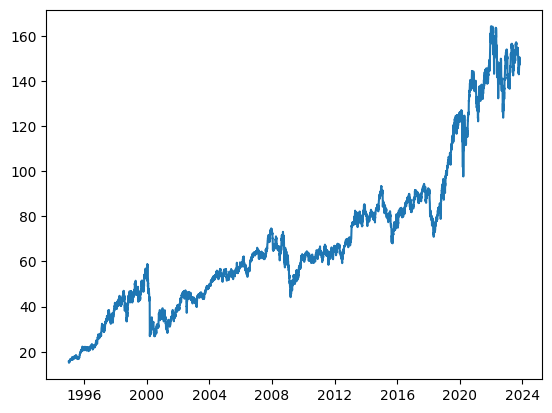

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.468750,15.625000,15.437500,15.593750,7.626412,3318400
1995-01-04,15.531250,15.656250,15.312500,15.468750,7.565282,2218800
1995-01-05,15.375000,15.437500,15.218750,15.250000,7.458296,2319600
1995-01-06,15.156250,15.406250,15.156250,15.281250,7.473581,3438000
1995-01-09,15.343750,15.406250,15.187500,15.218750,7.443015,1795200
...,...,...,...,...,...,...
2023-10-24,148.119995,150.070007,148.070007,149.899994,149.899994,6322000
2023-10-25,149.639999,151.190002,149.119995,150.600006,150.600006,6172900
2023-10-26,151.050003,151.380005,149.740005,149.800003,149.800003,7582100


In [8]:
# finding the mean of 100 values (100 days moving average)
ma100 = df.Close.rolling(100).mean()
ma100

Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-09         NaN
                ...   
2023-10-24    150.5873
2023-10-25    150.6281
2023-10-26    150.6667
2023-10-27    150.6934
2023-10-30    150.7255
Name: Close, Length: 7258, dtype: float64

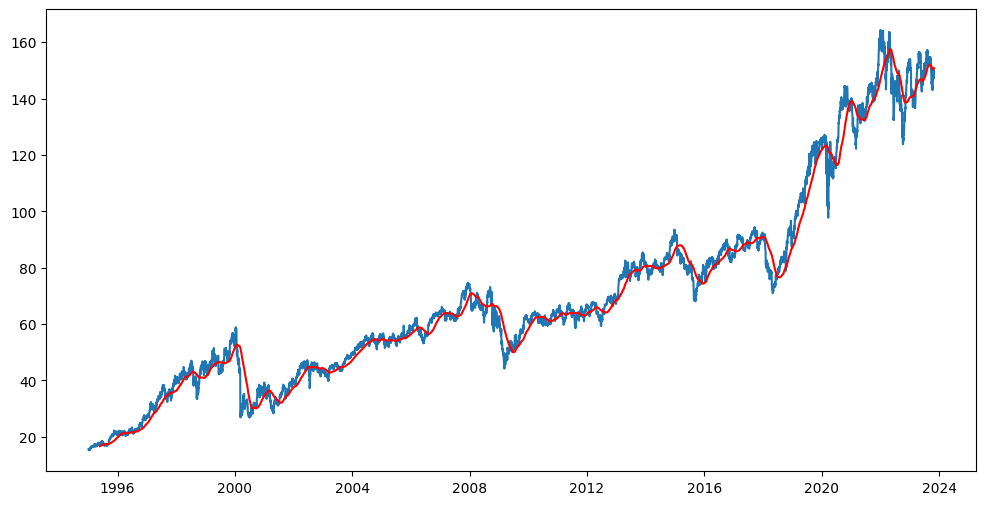

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
# finding 200 days moving average
ma200 = df.Close.rolling(200).mean()
ma200

Date
1995-01-03           NaN
1995-01-04           NaN
1995-01-05           NaN
1995-01-06           NaN
1995-01-09           NaN
                 ...    
2023-10-24    148.514651
2023-10-25    148.507451
2023-10-26    148.497001
2023-10-27    148.479501
2023-10-30    148.470501
Name: Close, Length: 7258, dtype: float64

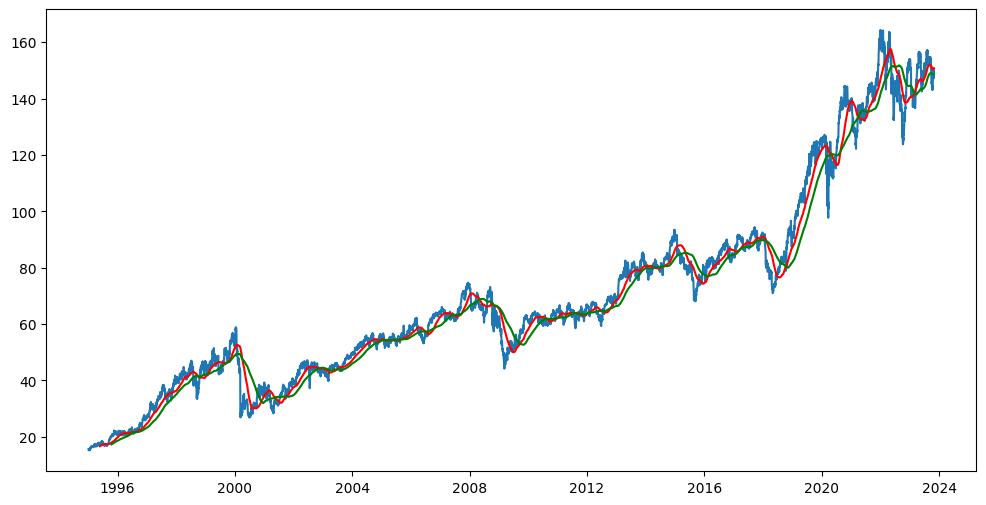

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

# TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(5080, 1)
(2178, 1)


In [13]:
data_training.head()

,Close
Date,
1995-01-03,15.59375
1995-01-04,15.46875
1995-01-05,15.25000
1995-01-06,15.28125
1995-01-09,15.21875


In [14]:
data_testing.head()

,Close
Date,
2015-03-09,83.089996
2015-03-10,81.540001
2015-03-11,81.389999
2015-03-12,82.089996
2015-03-13,81.830002


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[4.79286827e-03],
       [3.19524551e-03],
       [3.99405689e-04],
       ...,
       [8.83565246e-01],
       [8.87143905e-01],
       [8.61965452e-01]])

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train, y_train =np.array(x_train),np.array(y_train)

# MODEL SELECTION



In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import keras as k

In [19]:
model = Sequential()
model.add(LSTM(units = 50,activation ='relu' ,return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0,2))



model.add(LSTM(units = 60,activation ='relu' ,return_sequences = True,))
model.add(Dropout(0,3))




model.add(LSTM(units = 80,activation ='relu' ,return_sequences = True,))
model.add(Dropout(0,4))



model.add(LSTM(units =120,activation ='relu'))
model.add(Dropout(0,5))



model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam',loss ='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
156/156 [==============================] - 37s 196ms/step - loss: 0.0192
Epoch 2/50
156/156 [==============================] - 25s 158ms/step - loss: 9.3677e-04
Epoch 3/50
156/156 [==============================] - 25s 162ms/step - loss: 8.9315e-04
Epoch 4/50
156/156 [==============================] - 24s 157ms/step - loss: 8.2581e-04
Epoch 5/50
156/156 [==============================] - 25s 158ms/step - loss: 8.4874e-04
Epoch 6/50
156/156 [==============================] - 25s 157ms/step - loss: 7.6568e-04
Epoch 7/50
156/156 [==============================] - 25s 157ms/step - loss: 6.7221e-04
Epoch 8/50
156/156 [==============================] - 25s 158ms/step - loss: 6.2767e-04
Epoch 9/50
156/156 [==============================] - 24s 157ms/step - loss: 6.4295e-04
Epoch 10/50
156/156 [==============================] - 24s 157ms/step - loss: 5.3781e-04
Epoch 11/50
156/156 [==============================] - 25s 160ms/step - loss: 4.7901e-04
Epoch 12/50
156/156 [=============

In [22]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
data_testing.head()


,Close
Date,
2015-03-09,83.089996
2015-03-10,81.540001
2015-03-11,81.389999
2015-03-12,82.089996
2015-03-13,81.830002


In [24]:
data_training.tail(100)

,Close
Date,
2014-10-13,83.370003
2014-10-14,83.550003
2014-10-15,82.949997
2014-10-16,82.239998
2014-10-17,83.269997
...,...
2015-03-02,85.410004
2015-03-03,85.160004
2015-03-04,84.349998


In [25]:
past_100_days = data_testing.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-26-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [27]:
final_df.head()

,Close
0,146.440002
1,146.559998
2,145.410004
3,145.059998
4,146.419998


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.81518458],
       [0.81643258],
       [0.80447217],
       ...,
       [0.85012998],
       [0.82267289],
       [0.83151315]])

In [29]:
input_data.shape

(2278, 1)

In [30]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])



In [31]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2178, 100, 1)
(2178,)


In [32]:
# Making Predictions

y_predicted = model.predict(x_test)

69/69 [==============================] - 3s 44ms/step


In [33]:
y_predicted.shape

(2178, 1)

In [34]:
scaler.scale_

array([0.01040042])

In [35]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

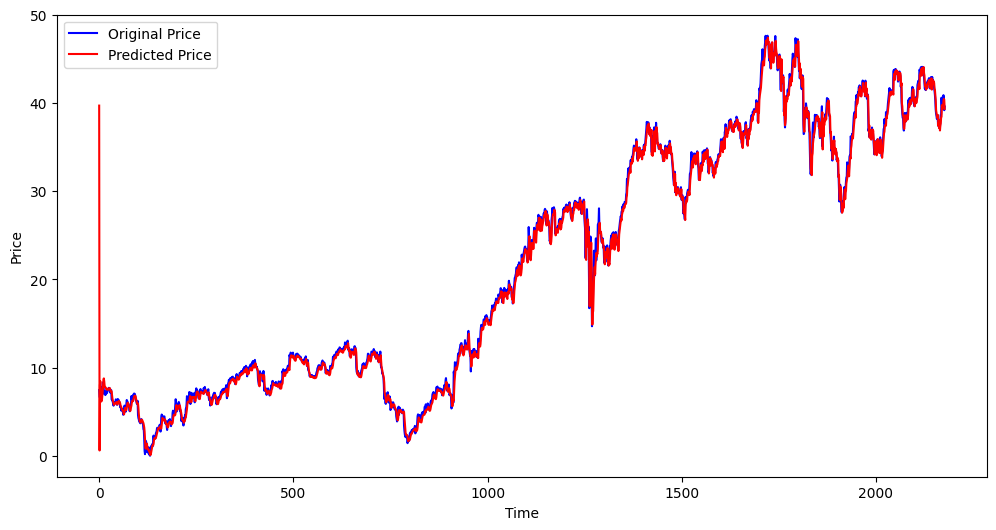

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()